In [2]:
import matplotlib.pyplot as pl
import numpy as np
from sklearn import datasets, linear_model
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris=pd.read_csv(fileURL, names=['Sepal_Length', 'Sepal_Width','Petal_Length','Petal_Width','Species'],header=None)
iris = iris.dropna()

In [3]:
iris[:5]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
type(iris)

pandas.core.frame.DataFrame

In [5]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                print col1
                print col2
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


Sepal_Length
Sepal_Length
Sepal_Width
Sepal_Width
Petal_Length
Petal_Length
Petal_Width
Petal_Width


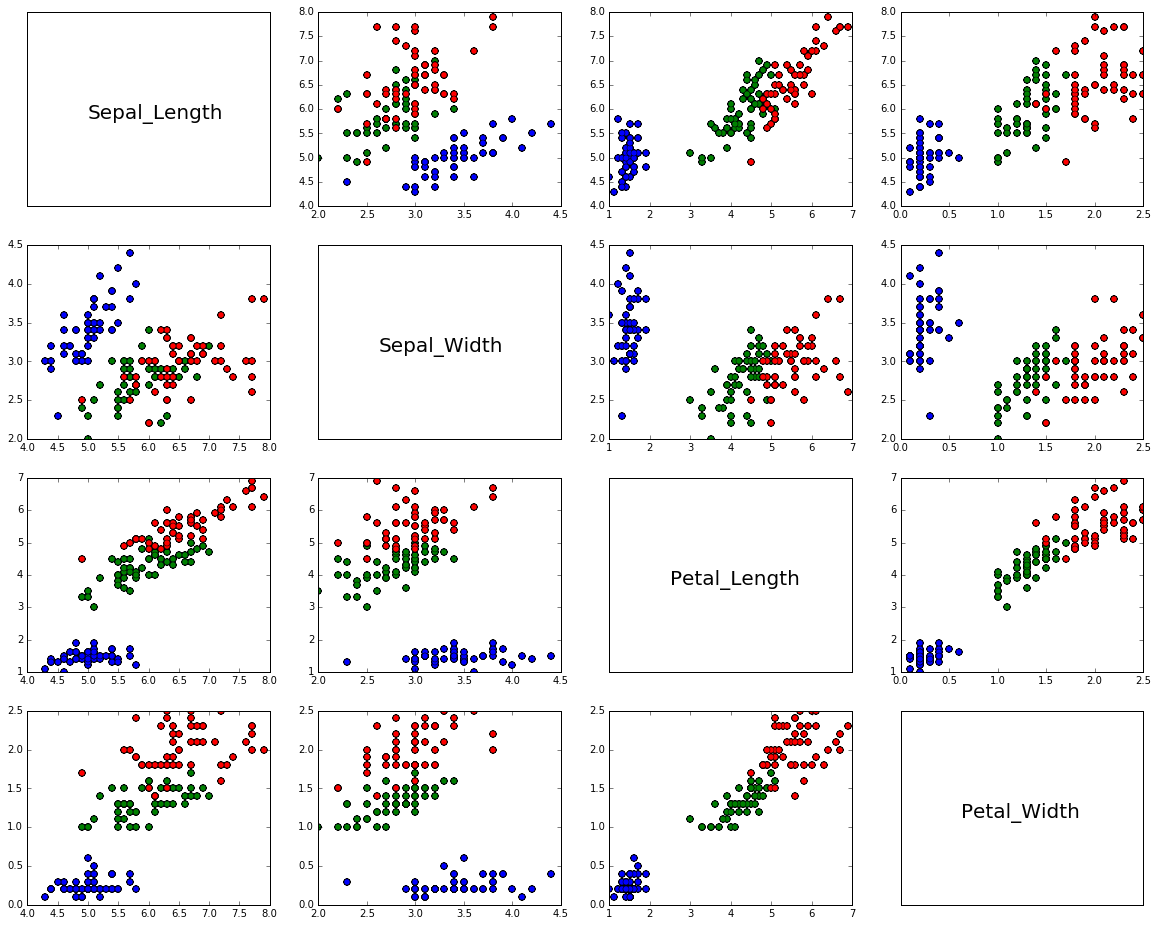

In [6]:
pairs(iris)

In [7]:
 # Divide columns into features and class.
features = list(iris.columns)
classes = features[-1] # create class column
del features[-1] # delete class column from feature vector

In [8]:
features

['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']

In [9]:
classes

'Species'

A Plot of the linear regression models generated on each pairwise combination of features, with corresponding model statistics:

In [10]:
from sklearn.cross_validation import train_test_split
train, test= train_test_split(iris)

def linear_regression_plot(iris, feature1, feature2):
    # Split the data into training/testing sets

    train_feature1 = train.ix[:, feature1]
    train_feature2 = train.ix[:, feature2]
    test_feature1 = test.ix[:, feature1]
    test_feature2 = test.ix[:, feature2]
    
    
    #call linear regression model
    regr = linear_model.LinearRegression()
    regr.fit(train_feature1,train_feature2)
    
    pl.plot(test_feature1, regr.predict(test_feature1), color='blue',linewidth=3)
    
    for name in iris[classes]:
                    cond = iris[classes] == name
                    pl.plot(test[features[feature1[0]]][cond], test[features[feature2[0]]][cond], linestyle='none', marker='o', label=name)
                
    # The coefficients
    print('Coefficients:', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % np.mean((regr.predict(test_feature1) - test_feature2) ** 2))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(test_feature1, test_feature2))

    # Plot outputs
    plt.xlabel(features[feature1[0]])
    plt.ylabel(features[feature2[0]])
    pl.xticks(())
    pl.yticks(())


    pl.show()

('Coefficients:', array([[-0.05237759]]))
Mean squared error: 0.21
Variance score: -0.00


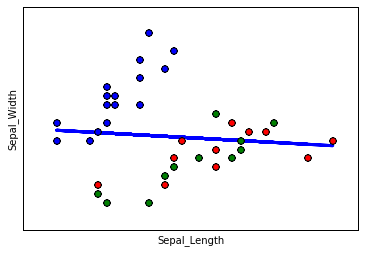

('Coefficients:', array([[ 1.89508667]]))
Mean squared error: 1.21
Variance score: 0.59


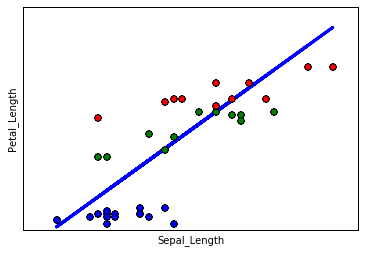

('Coefficients:', array([[ 0.76301998]]))
Mean squared error: 0.28
Variance score: 0.53


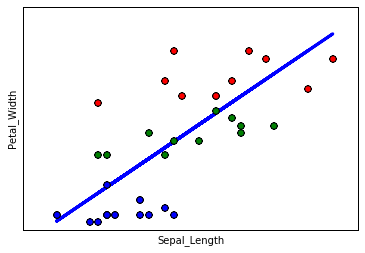

('Coefficients:', array([[-0.20184263]]))
Mean squared error: 0.66
Variance score: -0.01


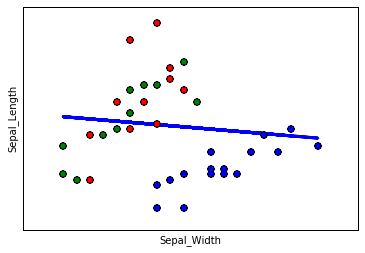

('Coefficients:', array([[-1.4710229]]))
Mean squared error: 2.28
Variance score: 0.23


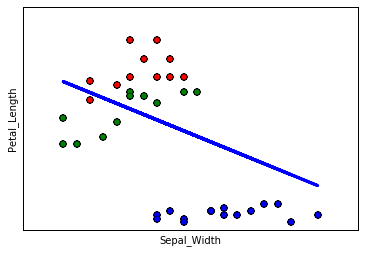

('Coefficients:', array([[-0.49684754]]))
Mean squared error: 0.49
Variance score: 0.19


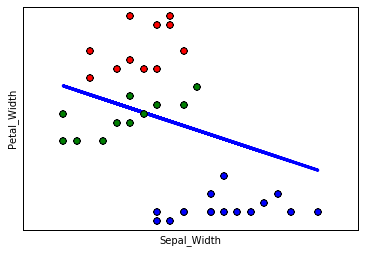

('Coefficients:', array([[ 0.42526888]]))
Mean squared error: 0.26
Variance score: 0.60


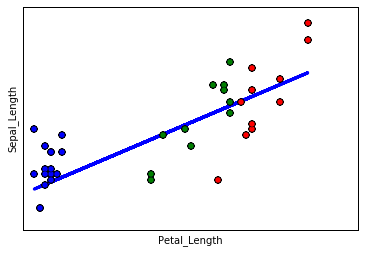

('Coefficients:', array([[-0.08566168]]))
Mean squared error: 0.15
Variance score: 0.27


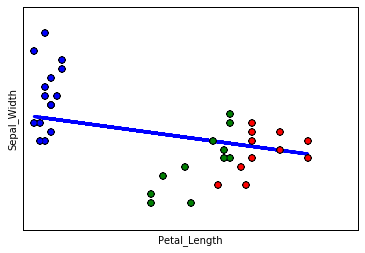

('Coefficients:', array([[ 0.41217559]]))
Mean squared error: 0.04
Variance score: 0.93


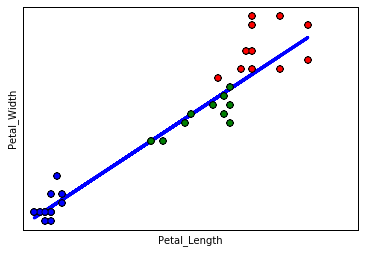

('Coefficients:', array([[ 0.93293182]]))
Mean squared error: 0.31
Variance score: 0.52


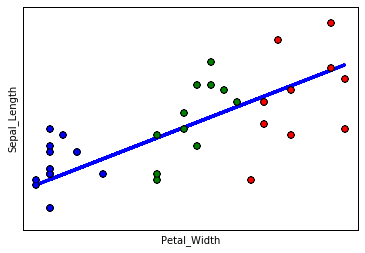

('Coefficients:', array([[-0.15764121]]))
Mean squared error: 0.17
Variance score: 0.21


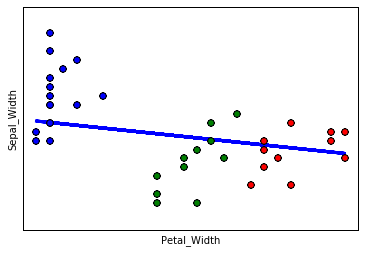

('Coefficients:', array([[ 2.24575172]]))
Mean squared error: 0.23
Variance score: 0.92


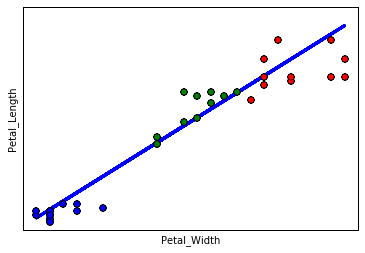

In [11]:
for x in range(4):
    for y in range(4):
     if(x != y):
        linear_regression_plot(iris,(x,), (y,))


The pair of features petal_length and pental Width has the smallest MSE 0.23. 

A plot of the best overall linear regression model you were able to generate using any combination of features(including the use of multiple features used in combination to predict a single feature), with corresponding model statistics. 

In [12]:
from mpl_toolkits.mplot3d import Axes3D

In [13]:
trainSet, testSet= train_test_split(iris)
train_X = trainSet.ix[:, 0:4]
train_Y = trainSet.ix[:,4]
test_X = testSet.ix[:,0:4]
test_Y = testSet.ix[:,4]

In [14]:
train_X[:5]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
64,5.6,2.9,3.6,1.3
117,7.7,3.8,6.7,2.2
98,5.1,2.5,3.0,1.1
74,6.4,2.9,4.3,1.3
69,5.6,2.5,3.9,1.1


In [15]:
test_X[:5]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
50,7.0,3.2,4.7,1.4
103,6.3,2.9,5.6,1.8
25,5.0,3.0,1.6,0.2
138,6.0,3.0,4.8,1.8
20,5.4,3.4,1.7,0.2


In [16]:
ols = linear_model.LinearRegression()


In [17]:
import itertools as iter
def allCombination(l,nums):
    return list(iter.permutations(l,nums))

In [18]:
def plot_figs(fig_num, elev, azim, train_X,test_X, clf,combination):
    clf.fit(train_X.ix[:,(combination[0],combination[1])], train_X.ix[:,combination[2]])
    fig = plt.figure(fig_num, figsize=(6, 5))
    plt.clf()
    params = clf.coef_
    a = params[0]
    b = params[1]
    ax = Axes3D(fig, elev=elev, azim=azim)
    x = test_X.ix[:, 0]
    y = test_X.ix[:, 1]
    z = clf.predict(test_X.ix[:,(0,1)])
    #print x
    #print y
    #print z
    # convert to 2d matrices
    X, Y = np.meshgrid(x, y) 
    zs= np.array([fun(x,a,y,b) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    
    ax.scatter(test_X.ix[:, combination[0]], test_X.ix[:, combination[1]], test_X.ix[:, combination[2]], c='k', marker='+', cmap=plt.cm.Paired)
    ax.plot_surface(X,Y,Z,rstride=1, cstride=1,alpha=0.2,cmap=cm.coolwarm,
    linewidth=0, antialiased=False)

    ax.set_xlabel(features[combination[0]])
    ax.set_ylabel(features[combination[1]])
    ax.set_zlabel(features[combination[2]])
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    
    
    print('Coefficients:', clf.coef_)
    # The mean squared error
    mse = np.mean((z-test_X.ix[:, 2])**2)
    print("Mean squared error: %.2f"
          % mse)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % clf.score(test_X.ix[:,(0,1)], test_X.ix[:, 2]))
    
    return mse, combination
     
    
def fun(x,a,y,b):
    return x*a + y*b
    

('Coefficients:', array([ 1.77461184, -1.2941147 ]))
Mean squared error: 0.36
Variance score: 0.88


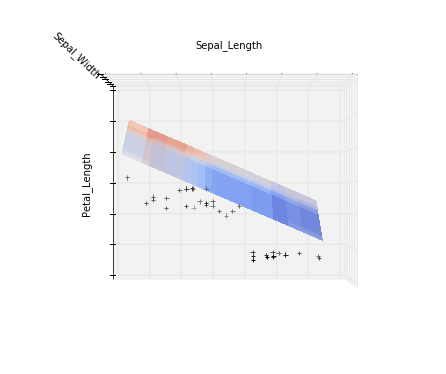

('Coefficients:', array([ 0.71804109, -0.4622295 ]))
Mean squared error: 7.38
Variance score: -1.53


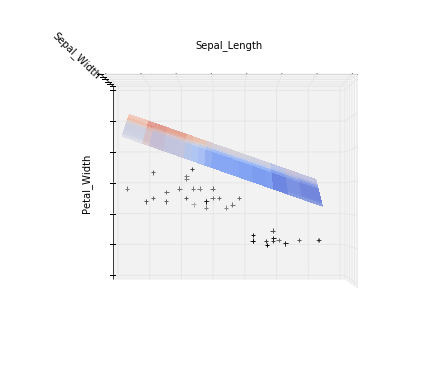

('Coefficients:', array([ 0.59666722, -0.3440476 ]))
Mean squared error: 1.71
Variance score: 0.41


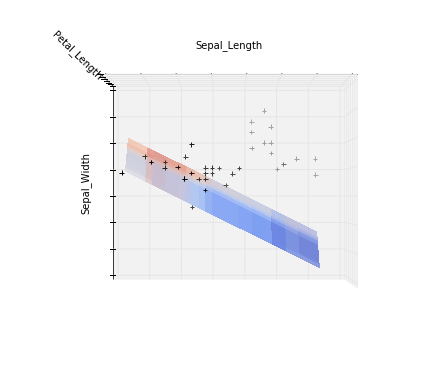

('Coefficients:', array([-0.09805835,  0.45803426]))
Mean squared error: 11.00
Variance score: -2.78


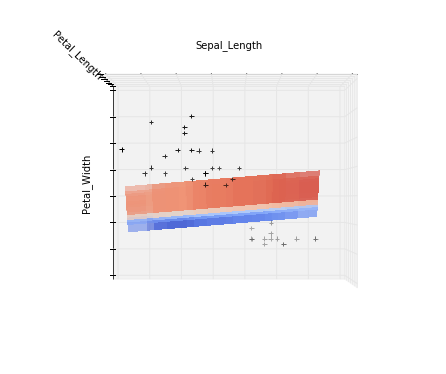

('Coefficients:', array([ 0.31884765, -0.47131278]))
Mean squared error: 4.22
Variance score: -0.45


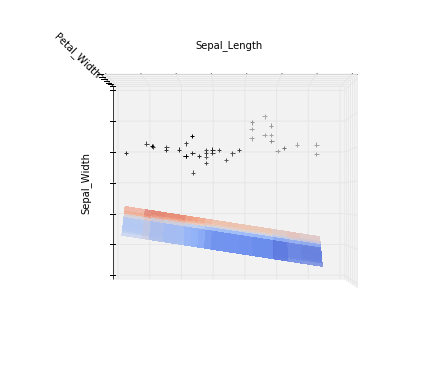

('Coefficients:', array([ 0.52527655,  1.75672487]))
Mean squared error: 15.27
Variance score: -4.24


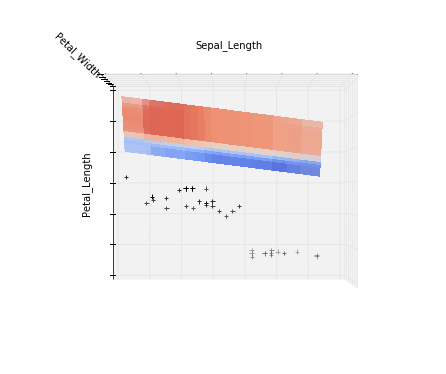

('Coefficients:', array([-1.2941147 ,  1.77461184]))
Mean squared error: 78.45
Variance score: -25.94


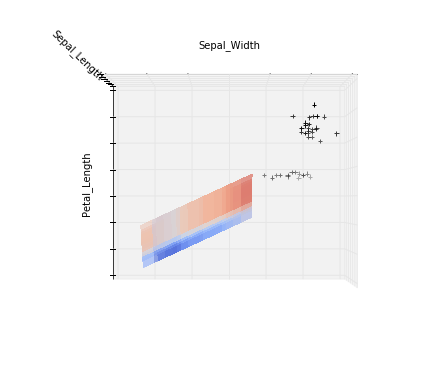

('Coefficients:', array([-0.4622295 ,  0.71804109]))
Mean squared error: 37.03
Variance score: -11.71


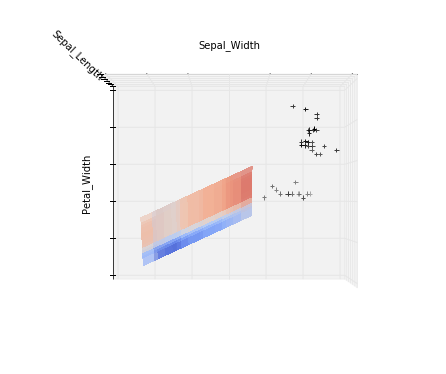

('Coefficients:', array([ 0.60002   ,  0.47444152]))
Mean squared error: 14.70
Variance score: -4.05


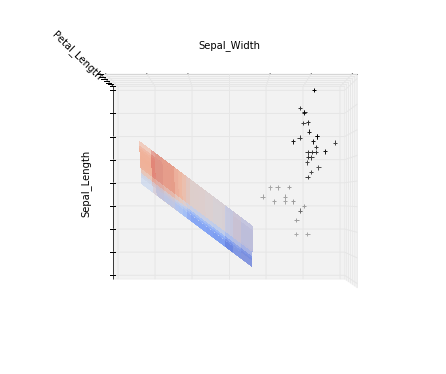

('Coefficients:', array([ 0.09220381,  0.42585431]))
Mean squared error: 9.08
Variance score: -2.12


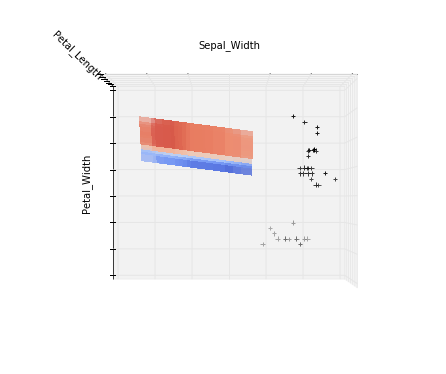

('Coefficients:', array([ 0.4266658 ,  0.97972788]))
Mean squared error: 30.21
Variance score: -9.37


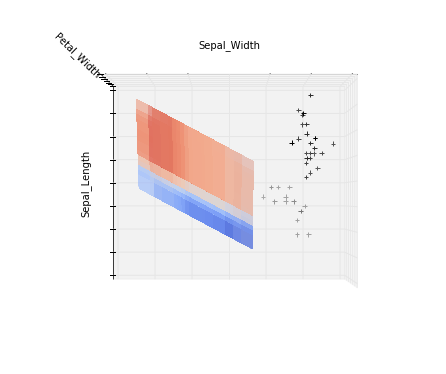

('Coefficients:', array([-0.30841579,  2.17339119]))
Mean squared error: 17.34
Variance score: -4.95


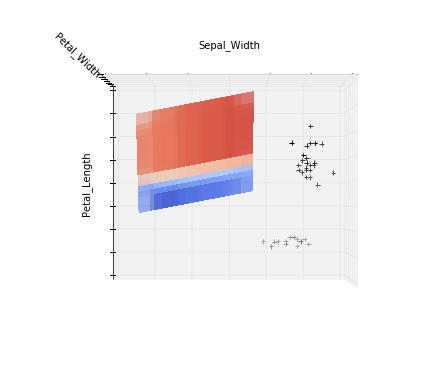

('Coefficients:', array([-0.3440476 ,  0.59666722]))
Mean squared error: 12.98
Variance score: -3.46


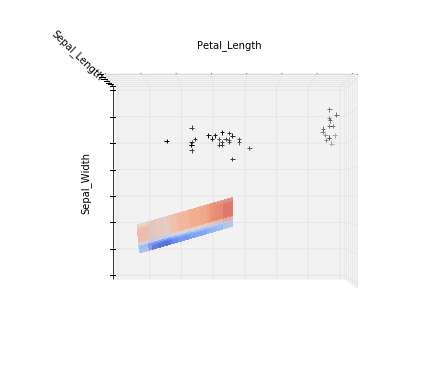

('Coefficients:', array([ 0.45803426, -0.09805835]))
Mean squared error: 3.42
Variance score: -0.17


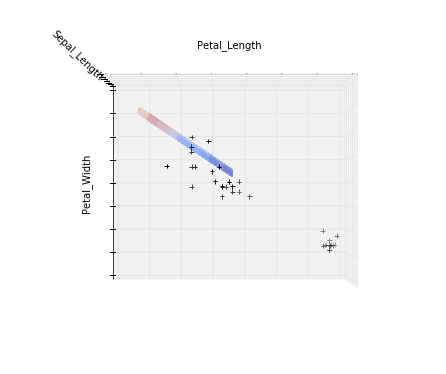

('Coefficients:', array([ 0.47444152,  0.60002   ]))
Mean squared error: 12.70
Variance score: -3.36


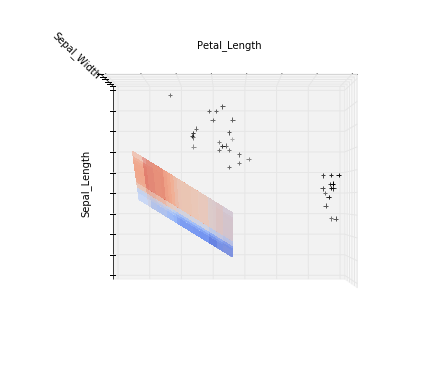

('Coefficients:', array([ 0.42585431,  0.09220381]))
Mean squared error: 4.51
Variance score: -0.55


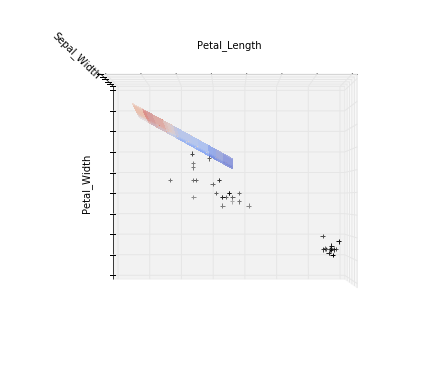

('Coefficients:', array([ 0.59521514, -0.4261636 ]))
Mean squared error: 8.34
Variance score: -1.86


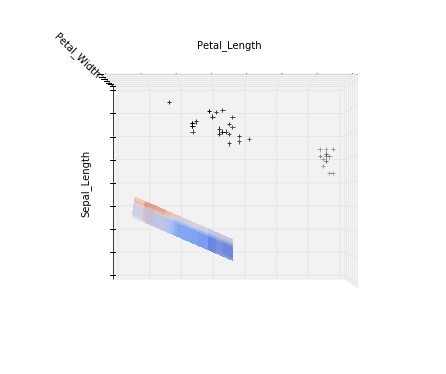

('Coefficients:', array([-0.26116679,  0.3984805 ]))
Mean squared error: 4.03
Variance score: -0.38


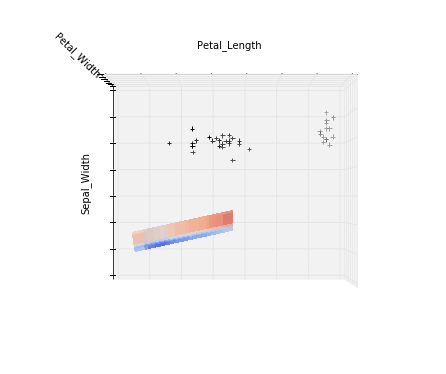

('Coefficients:', array([-0.47131278,  0.31884765]))
Mean squared error: 17.77
Variance score: -5.10


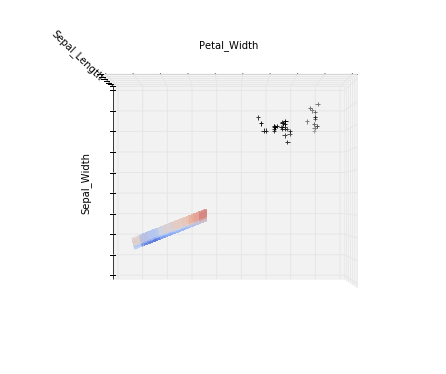

('Coefficients:', array([ 1.75672487,  0.52527655]))
Mean squared error: 47.27
Variance score: -15.23


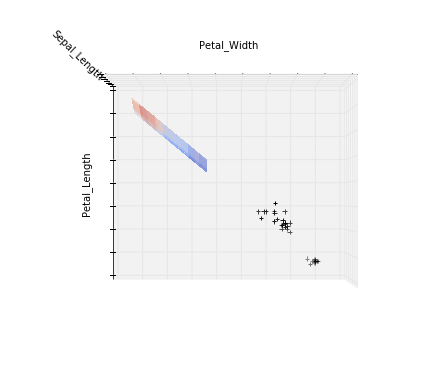

('Coefficients:', array([ 0.97972788,  0.4266658 ]))
Mean squared error: 46.98
Variance score: -15.13


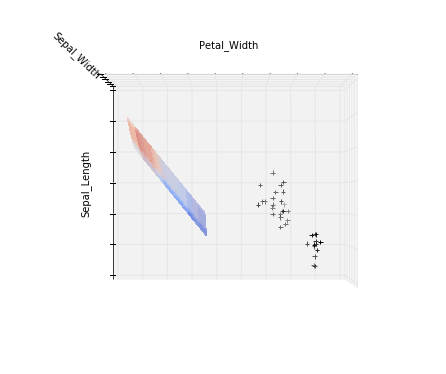

('Coefficients:', array([ 2.17339119, -0.30841579]))
Mean squared error: 103.49
Variance score: -34.53


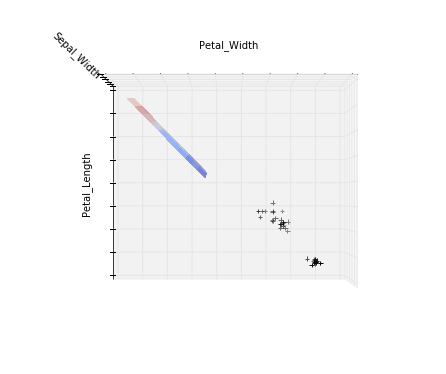

('Coefficients:', array([-0.4261636 ,  0.59521514]))
Mean squared error: 4.54
Variance score: -0.56


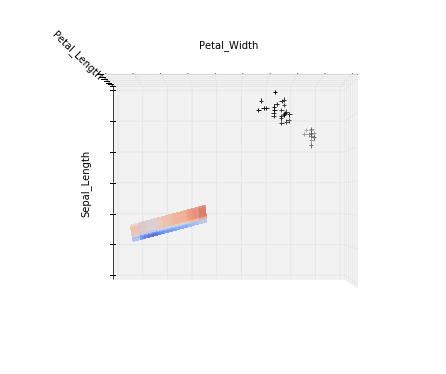

('Coefficients:', array([ 0.3984805 , -0.26116679]))
Mean squared error: 3.91
Variance score: -0.34


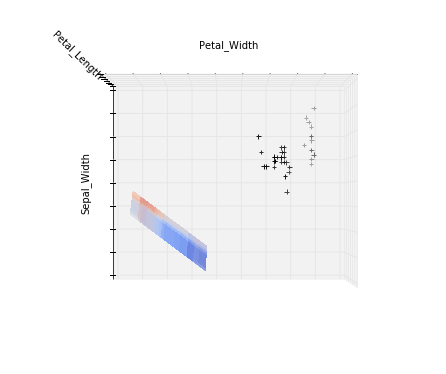

smallest MSE in three features combination: 0.36
(' three features: ', (0, 1, 2))
('feature1: ', 'Sepal_Length')
('feature2: ', 'Sepal_Width')
('feature3: ', 'Petal_Length')


In [19]:
allCom =  allCombination([0,1,2,3], 3)

finalMSE = float("inf")
finalCombination = None
for com in allCom:
    #Generate the three different figures from different views
    elev = -.5
    azim = 90
    mse,combination = plot_figs(1, elev, azim, train_X,test_X, ols,com)
    if(mse < finalMSE):
        finalMSE = mse
        finalCombination = combination
    plt.show()

    
print ("smallest MSE in three features combination: %.2f" % finalMSE)
print (" three features: ", finalCombination )
print ("feature1: ", features[finalCombination[0]])
print ("feature2: ", features[finalCombination[1]])
print ("feature3: ", features[finalCombination[2]])

It shows that using two features 'Sepal_Length' and 'Sepal_Width' to predict 'Petal_length' gives us 0.28 MSE, however
the pair of features petal_length and pental Width has the smallest MSE 0.23. 

If removing petal_width, which shows the best predictive feature in pairs, it still does not have much affect on classification. Since based on our three features model, features sepal length, sepal width and petal length can also perform classification.  